In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import CarTrajectoryNonLinear, PF, plot_trajectory, conf_ellipse

from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from matplotlib import animation, rc

In [2]:
system = CarTrajectoryNonLinear()
states, measurements = system.get_data()

f = system.f
F_jacobian = system.F_jacobian
h = system.h
H_jacobian = system.H_jacobian
Q = system.Q
R = system.R

In [3]:
particle_filter = PF(f, h, Q, R, dim_m = 4, dim_y = 2)
state_estimates, cov_estimates, particle_history, weights_history = particle_filter.filter(measurements, verbose=True)
state_estimates_smoothed, cov_estimates_smoothed = particle_filter.smoother(state_estimates, cov_estimates, particle_history, weights_history, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

NameError: name 'f' is not defined

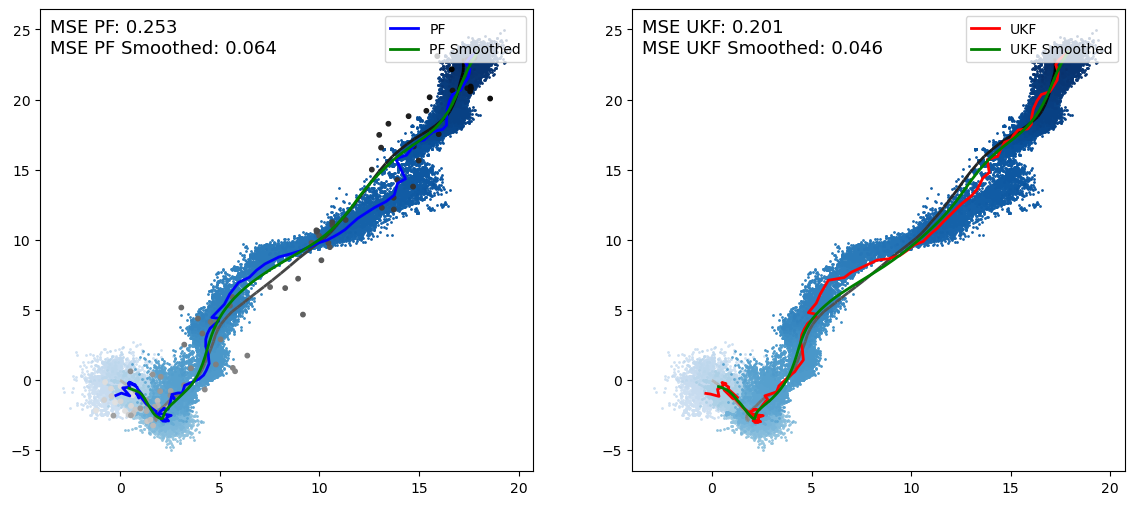

In [37]:
from matplotlib.collections import LineCollection
from matplotlib.cm import get_cmap  

n = len(measurements)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Create a set of line segments
points = np.array([states[:, 0], states[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
greys = get_cmap('Greys')(np.linspace(0.4, 1, len(segments)))
lc1 = LineCollection(segments, colors=greys, linewidths=2)
lc2 = LineCollection(segments, colors=greys, linewidths=2)

# Plot line
ax[0].add_collection(lc1)
ax[1].add_collection(lc2)

# Plot particle history
blues = get_cmap('Blues')(np.linspace(0.2, 1.0, n))
for k in range(n):
    ax[0].scatter(particle_history[k, :, 0], particle_history[k, :, 1], s=1, color=blues[k])
    ax[1].scatter(particle_history[k, :, 0], particle_history[k, :, 1], s=1, color=blues[k])


# Plot measurements
greys = get_cmap('Greys')(np.linspace(0.2, 1, n))
ax[0].scatter(measurements[:, 0], measurements[:, 1], s=10, c=greys)

# Plot state estimates
ax[0].plot(state_estimates[:, 0], state_estimates[:, 1], color='blue', linewidth=2, label='PF')

# Plot state estimates smoothed
ax[0].plot(state_estimates_smoothed[:, 0], state_estimates_smoothed[:, 1], color='green', linewidth=2, label='PF Smoothed')

# Plot UKF
ax[1].plot(state_estimates_UKF[:, 0], state_estimates_UKF[:, 1], color='red', linewidth=2, label='UKF')

# Plot Smoothed UKF
ax[1].plot(state_estimates_smoothed_UKF[:, 0], state_estimates_smoothed_UKF[:, 1], color='green', linewidth=2, label='UKF Smoothed')

# Show MSE for PF and PF Smoothed on ax[0]
mse = np.mean((state_estimates[:, :2] - states[:, :2])**2)
mse_smoothed = np.mean((state_estimates_smoothed[:, :2] - states[:, :2])**2)
ax[0].text(0.02, 0.98, f'MSE PF: {mse:.3f}\nMSE PF Smoothed: {mse_smoothed:.3f}', transform=ax[0].transAxes, fontsize=13, verticalalignment='top')

mse = np.mean((state_estimates_UKF[:, :2] - states[:, :2])**2)
mse_smoothed = np.mean((state_estimates_smoothed_UKF[:, :2] - states[:, :2])**2)
ax[1].text(0.02, 0.98, f'MSE UKF: {mse:.3f}\nMSE UKF Smoothed: {mse_smoothed:.3f}', transform=ax[1].transAxes, fontsize=13, verticalalignment='top')

# Align legend top right
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.show()